<a href="https://colab.research.google.com/github/faridelya/Outlier-Anomalies/blob/main/Copy_of_Mix_Data_Outlier_Detection_with_ECOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [**PyOD:**](https://pypi.org/project/pyod/)
**PyOD is a comprehensive and scalable Python toolkit for detecting outlying objects in multivariate data**. This exciting yet challenging field is commonly referred as Outlier Detection or Anomaly Detection.

PyOD includes more than 30 detection algorithms, f**rom classical LOF (SIGMOD 2000)** to the **latest SUOD (MLSys 2021)** and **ECOD (TKDE 2022)**. Since 2017, PyOD has been successfully used in numerous academic researches and commercial products with more than 5 million downloads. It is also well acknowledged by the machine learning community with various dedicated posts/tutorials, **including Analytics Vidhya, KDnuggets, Towards Data Science, Computer Vision News, and awesome-machine-learning.**

# **We are Using:** 

*   Probabilistic Alogorithm <br> 
        Name: ECOD 
        Unsupervised Outlier Detection Using Empirical Cumulative Distribution Functions



# **Installing Dependences**

In [ ]:
!pip install pyod &> /dev/null

In [ ]:
!pip install combo>=0.0.8

In [ ]:
!pip install joblib &> /dev/null

In [ ]:
!pip install numba>=0.35 &> /dev/null

In [ ]:
!pip install scipy>=0.19.1 &> /dev/null

In [ ]:
!pip install statsmodels &> /dev/null

[PyOD link](https://pyod.readthedocs.io/en/latest/index.html)<br>

[Reasearch_Paper (COPOD)  Copula-Based Outlier Detection](
https://arxiv.org/abs/2009.09463)




In [ ]:
from __future__ import division
from __future__ import print_function

import os
import sys
from pyod.models.ecod  import ECOD
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:

import pandas as pd
import io
mix_data = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
mix_data.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0


In [ ]:
mix_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# **Train and Target Split**

In [ ]:
X = mix_data.drop(columns=["target"], axis=1)
y = mix_data.target

# **Print X, y**

In [ ]:
print(X.shape)
X.head(4)


(1025, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3


In [ ]:
print(y.shape)
y.head(4)

(1025,)


0    0
1    0
2    0
3    0
Name: target, dtype: int64

# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
                                                     

In [ ]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
866,41,1,2,112,250,0,1,179,0,0.0,2,0,2
749,58,1,1,125,220,0,1,144,0,0.4,1,4,3
212,50,1,0,150,243,0,0,128,0,2.6,1,0,3
79,52,1,1,134,201,0,1,158,0,0.8,2,1,2
148,52,1,3,152,298,1,1,178,0,1.2,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


## **Build model ECOD**<br>

*   [ECOD Module link](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.ecod)
*   [Research-Paper ECOD: Unsupervised Outlier Detection Using Empirical Cumulative Distribution Functions](https://arxiv.org/abs/2201.00382)
*   [GitHub link](https://github.com/yzhao062/pyod#id15)




In [ ]:
#contamination = 0.1  # percentage of outliers
# train ECOD detector
clf_name = 'ECOD'
clf = ECOD()

# you could try parallel version as well.
# clf = ECOD(n_jobs=2)
#You can use contimination value of 0.5 if data is high dimensional
clf.fit(X_train)

                       

ECOD(contamination=0.1, n_jobs=1)

### **Assign Label and Score** 

In [ ]:
# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores


### **Make DataFrame for Label and Score**

In [ ]:
y_test_prd = pd.DataFrame(y_train_pred, columns=['Label_0_1'])
y_train_scre = pd.DataFrame( y_train_scores, columns=['decision_score'])                         
result_score = pd.concat([y_test_prd, y_train_scre], axis=1)
result_score.head(4)

,Label_0_1,decision_score
0,0,12.966534
1,0,12.464628
2,0,11.931038
3,0,9.439324


In [ ]:
result_score.columns

Index(['Label_0_1', 'decision_score'], dtype='object')

## **Final DataFrame with Label and Socre ForTraining data**

*   labels (0: inliers, 1: outliers)
*   Decision_score (raw outlier scores)



In [ ]:
# show All DataFrame in Output
import pandas as pd
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [ ]:
# reset index to avoid merge conflict on index
X_train.reset_index(drop=True, inplace=True)
result_score.reset_index(drop=True, inplace=True)

In [ ]:
concat_score_with_X_train = pd.concat([X_train,result_score],axis=1)
concat_score_with_X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Label_0_1,decision_score
0,41,1,2,112,250,0,1,179,0,0.0,2,0,2,0,12.966534
1,58,1,1,125,220,0,1,144,0,0.4,1,4,3,0,12.464628
2,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0,11.931038
3,52,1,1,134,201,0,1,158,0,0.8,2,1,2,0,9.439324
4,52,1,3,152,298,1,1,178,0,1.2,1,0,3,0,16.296857


# [**What if we do not know the right contamination?**](https://towardsdatascience.com/anomaly-detection-in-python-part-2-multivariate-unsupervised-methods-and-code-b311a63f298b)
In this case, we analyze the decision_function() output:<br>
**Apply a Univariate Anomaly Detection algorithm** on the specific algorithm Decision Function Output(like the **tukey’s method**.) This is a standard method — where we calculate an ‘Anomaly Score’(here, the decision function output) using a Multivariate algorithm; Then, to select which of these anomaly scores correspond to outliers, we apply a Univariate Anomaly detection algorithm on the scores.
To select the appropriate anomaly, domain/business analysis needs to be done.

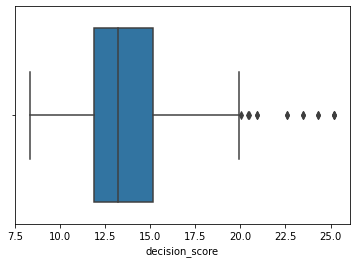

In [ ]:
# contimination value (Threshold) where outlier fall
import seaborn as sns
sns.boxplot(data=concat_score_with_X_train, x= 'decision_score')

The above plot tells us that raw_outlier_score above 20 is concidered as outliers. we can change contimination value so the score will be different

In [ ]:
X_test.shape

(339, 13)

### **Get Prediction for Test Data**

In [ ]:

# get the prediction on the test data
x_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
x_test_scores = clf.decision_function(X_test)  # outlier scores

In [ ]:
X_test_prd = pd.DataFrame(x_test_pred, columns=['test_Label_0_1'])
X_test_score = pd.DataFrame( x_test_scores, columns=['test_decision_score'])                         
test_result_score = pd.concat([X_test_prd, X_test_score], axis=1)
test_result_score.head(4)

In [ ]:
# reset index to avoid merge conflict on index
X_test.reset_index(drop=True, inplace=True)
test_result_score.reset_index(drop=True, inplace=True)

### **Full Test DataFrame with Label and Score** 

In [ ]:
X_test_with_label = pd.concat([X_test,test_result_score],axis=1)
print(X_test_with_label.shape)
X_test_with_label.head(4)

(339, 15)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,test_Label_0_1,test_decision_score
0,62,0,0,124,209,0,1,163,0,0.0,2,0,2,0,11.229779
1,53,0,2,128,216,0,0,115,0,0.0,2,0,0,0,16.209437
2,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0,11.834660
3,50,0,1,120,244,0,1,162,0,1.1,2,0,2,0,9.981466


### **Evaluate**

In [ ]:
# evaluate and print the results
print("\n On Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\n On Test Data:")
evaluate_print(clf_name, y_test, x_test_scores)




 On Training Data:
ECOD ROC:0.3646, precision @ rank n:0.4202

 On Test Data:
ECOD ROC:0.4207, precision @ rank n:0.4702


## **Evaluation of Precision Recall F1**

**Train Report:**

In [ ]:
from sklearn.metrics import classification_report
target_names = ['0: inliers', '1: outliers']
print(classification_report(y_train, y_train_pred, target_names=target_names))


              precision    recall  f1-score   support

  0: inliers       0.47      0.89      0.62       328
 1: outliers       0.49      0.09      0.15       358

    accuracy                           0.48       686
   macro avg       0.48      0.49      0.39       686
weighted avg       0.48      0.48      0.38       686



**Test Report:**

In [ ]:
print(classification_report(y_test, x_test_pred, target_names=target_names))

              precision    recall  f1-score   support

  0: inliers       0.50      0.87      0.64       171
 1: outliers       0.49      0.12      0.20       168

    accuracy                           0.50       339
   macro avg       0.50      0.50      0.42       339
weighted avg       0.50      0.50      0.42       339



## **Get the Data which contain label**

### **Train_data**

*   0: inliers




In [46]:
inlier_train_data = concat_score_with_X_train[concat_score_with_X_train['Label_0_1'] == 0]
inlier_train_data.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Label_0_1,decision_score
0,41,1,2,112,250,0,1,179,0,0.0,2,0,2,0,12.966534
1,58,1,1,125,220,0,1,144,0,0.4,1,4,3,0,12.464628
2,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0,11.931038
3,52,1,1,134,201,0,1,158,0,0.8,2,1,2,0,9.439324




*  1: outlier




In [47]:
outlier_train_data = concat_score_with_X_train[concat_score_with_X_train['Label_0_1'] == 1]
outlier_train_data.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Label_0_1,decision_score
16,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1,17.675456
30,59,1,0,164,176,1,0,90,0,1.0,1,2,1,1,20.917231
38,62,0,0,160,164,0,0,145,0,6.2,0,3,3,1,23.496168
43,54,1,1,192,283,0,0,195,0,0.0,2,1,3,1,18.310531


### **Test Data**

*   0: inliers




In [48]:
inliers_test_data = X_test_with_label[X_test_with_label['test_Label_0_1'] == 0]
inliers_test_data.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,test_Label_0_1,test_decision_score
0,62,0,0,124,209,0,1,163,0,0.0,2,0,2,0,11.229779
1,53,0,2,128,216,0,0,115,0,0.0,2,0,0,0,16.209437
2,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0,11.834660
3,50,0,1,120,244,0,1,162,0,1.1,2,0,2,0,9.981466




*   1: outlier



In [49]:
outlier_test_data = X_test_with_label[X_test_with_label['test_Label_0_1'] == 1]
outlier_test_data.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,test_Label_0_1,test_decision_score
9,70,1,0,145,174,0,1,125,1,2.6,0,0,3,1,18.948465
11,59,1,0,170,326,0,0,140,1,3.4,0,0,3,1,18.188711
13,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1,18.157316
25,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1,18.033064


### **Model Save & Load**

In [ ]:
from joblib import dump, load

# save the model
# dump(clf, 'clf.joblib')
# load the model
# clf = load('clf.joblib')